### Data Cleaning and Model Testing
- Primary function of this file was to generate the data cleaning operations which would be used in the loop which would be run in notebook 4.1 and create the final data that the models would be used on.
- At the end there is a short section on steps to maximising the results for the model after we began the task of shrinking the average size of the pickle files.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats
from pathlib import Path
import pickle
import numpy as np
import math
import time

import gc
import psutil
import multiprocessing
#from multiprocessing import Pool
import os
import signal
from os import getpid
from sys import argv, exit

In [2]:
psutil.virtual_memory()

svmem(total=67481169920, available=20288036864, percent=69.9, used=38434529280, free=18850299904, active=33295351808, inactive=13822763008, buffers=64139264, cached=10132201472, shared=8072159232, slab=733089792)

In [3]:
cd tmp

/home/team9/tmp


In [4]:
cd data

/home/team9/tmp/data


In [5]:
ls

46A_COPY_MADE_FOR_XING_TO_CHECK.pickle
ben_models/
Custom_location_53_345035_-6_267261_62b5c8e6c91d98000ba01ceb.csv
final_data/
leavetimes/
lines_no_outliers/
mesh_xing_ben_victoria-Copy1.ipynb
mesh_xing_ben_victoria.ipynb
pickle_files/
rt_trips_DB_2018.txt
rt_vehicles_DB_2018.txt
test_46A_copy.pkl
test_46a_dask_2.csv
test_46a_dask.csv
test_46a_max_values.pkl
test_46a_min_estimators.pkl
test_46A_v_2.pkl
test_46A_victoria.pkl
test_pickle_ben.pickle
test_pickle_ben.pkl
test_pickle_victoria.pkl
trips_lines_ready.csv
trips_modelling.csv
trips_ready.csv
weather_factorised.csv
weather_ready.csv
weather_trips.csv
XING_TEST_46A_2.csv


In [6]:
df = pd.read_csv('lines_no_outliers/line_46A_1.csv')

In [7]:
df.JOURNEY_TIME.min()

-1032

In [8]:
df["DOY"] = df["DOY"].astype("int16")
df["TRIPID"] = df["TRIPID"].astype("int32")
df["PROGRNUMBER"] = df["PROGRNUMBER"].astype("int8")
df["STOPPOINTID"] = df["STOPPOINTID"].astype("int16")

df["PLANNEDTIME_ARR"] = df["PLANNEDTIME_ARR"].astype("int32")

df["ACTUALTIME_ARR"] = df["ACTUALTIME_ARR"].astype("int32")
df["LINEID_DIRECTION"] = df["LINEID_DIRECTION"].astype("category")

df["JOURNEY_TIME"] = df["JOURNEY_TIME"].astype("int32")
df["HOUR"] = df["HOUR"].astype("int8")
df["MONTH"] = df["MONTH"].astype("int8")
df["error"] = df["error"].astype("int32")

df["DAYOFWEEK"] = df["DAYOFWEEK"].astype("int8")
df["temp"] = df["temp"].astype("int8")
df["wind_speed"] = df["wind_speed"].astype("int8")
df["weather_main"] = df["weather_main"].astype("category")

In [9]:
df = df.loc[df.PROGRNUMBER != 1]

In [10]:
negs = df.loc[df.JOURNEY_TIME <= 0]

In [12]:
negs

,Unnamed: 0,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,DOY,LINEID_DIRECTION,JOURNEY_TIME,HOUR,temp,wind_speed,weather_main,DAYOFWEEK,MONTH,error
22601,26479120,6390042,11,818,71953,72016,67,46A_1,-197,20,19,4,0,4,3,63
27050,103916357,8169420,3,809,60962,61061,347,46A_1,0,17,6,8,1,3,12,99
57600,26338451,6583812,14,6059,44291,44375,90,46A_1,-265,12,6,8,1,5,3,84
60298,26334037,6583812,13,264,44146,44249,90,46A_1,-391,12,6,8,1,5,3,103
61645,26342838,6583812,15,334,44460,44581,90,46A_1,-59,12,6,8,1,5,3,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872935,20467867,6386888,6,812,64472,64663,69,46A_1,-697,18,14,2,0,2,3,191
1881453,20465629,6386888,4,810,64404,64518,69,46A_1,-842,18,14,2,0,2,3,114
1888380,20470095,6386888,8,814,64631,64735,69,46A_1,-625,18,14,2,0,2,3,104
1901363,20468993,6386888,7,813,64496,64696,69,46A_1,-664,18,14,2,0,2,3,200


In [13]:
neggg = negs.groupby(['TRIPID','DOY']).size().reset_index().rename(columns={0:'count'})

In [14]:
neggg

,TRIPID,DOY,count
0,6260584,48,1
1,6386888,69,12
2,6390042,67,12
3,6583638,90,1
4,6583812,90,6
5,6642206,110,5
6,6761510,135,1
7,6771282,143,1
8,7021986,172,1
9,7155028,194,1


In [15]:
neglist = neggg.TRIPID.tolist()
print(neglist)
print(len(neglist))

negDOY = neggg.DOY.tolist()
print(negDOY)
print(len(negDOY))

[6260584, 6386888, 6390042, 6583638, 6583812, 6642206, 6761510, 6771282, 7021986, 7155028, 7324517, 8014997, 8018065, 8064311, 8097870, 8169420, 8589277]
17
[48, 69, 67, 90, 90, 110, 135, 143, 172, 194, 229, 286, 285, 300, 263, 347, 363]
17


In [16]:
negs.TRIPID.value_counts()

8589277    22
6386888    12
6390042    12
8018065     9
8097870     6
6583812     6
6642206     5
6583638     1
7324517     1
6761510     1
8169420     1
8014997     1
6260584     1
6771282     1
8064311     1
7021986     1
7155028     1
Name: TRIPID, dtype: int64

In [17]:
negs.shape

(82, 16)

In [18]:
for T in range(0, len(neglist)):
    df = df.loc[(df.TRIPID != neglist[T]) & (df.DOY != negDOY[T])]

In [19]:
#df = df.loc[df.PROGRNUMBER != 1]

In [20]:
#df = df.loc[df.JOURNEY_TIME != 0]

In [21]:
df = df.drop("Unnamed: 0", axis =1)

In [22]:
df

,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,DOY,LINEID_DIRECTION,JOURNEY_TIME,HOUR,temp,wind_speed,weather_main,DAYOFWEEK,MONTH,error
0,7021918,56,2034,68504,68890,169,46A_1,4819,19,16,6,0,0,6,386
1,7021983,56,2034,67535,67551,169,46A_1,4590,19,16,6,0,0,6,16
2,6259158,31,763,83694,84138,41,46A_1,2243,23,12,8,0,0,2,444
3,6259158,30,762,83656,84056,41,46A_1,2161,23,12,8,0,0,2,400
4,6259158,32,2007,83745,84182,41,46A_1,2287,23,12,8,0,0,2,437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965661,7757669,8,814,33612,33644,271,46A_1,430,9,9,4,0,4,9,32
1965662,7165314,4,810,38884,39031,192,46A_1,192,11,9,4,0,2,7,147
1965663,6392125,59,2039,28301,28134,72,46A_1,4155,8,3,4,0,1,3,-167
1965664,7647152,14,6059,58214,57955,248,46A_1,846,16,9,8,1,2,9,-259


In [23]:
df.MONTH.value_counts()

1     178106
11    164537
4     163938
5     162656
2     158718
7     152935
9     152523
6     151861
10    150326
8     145748
3     135831
12    125705
Name: MONTH, dtype: int64

In [24]:
df.DAYOFWEEK.value_counts()

0    306808
1    285913
2    279008
3    273158
4    263077
6    223386
5    211534
Name: DAYOFWEEK, dtype: int64

Text(0.5, 0, 'Time (seconds)')

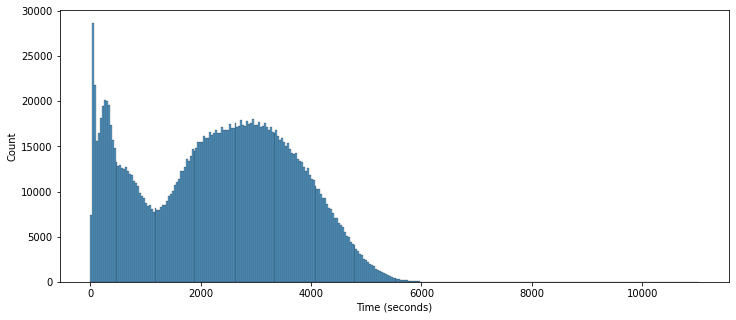

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(df['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (seconds)')

In [27]:
df = df[df.JOURNEY_TIME < df.JOURNEY_TIME.quantile(.999)]

Text(0.5, 0, 'Time (seconds)')

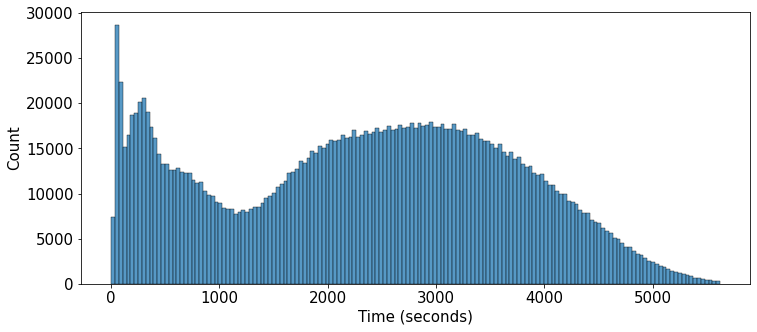

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(df['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (seconds)')

In [29]:
print(len(df.loc[df['JOURNEY_TIME']<30]))

1926


In [30]:
short_trips = df.loc[df['JOURNEY_TIME']<30]

In [31]:
short_trips

,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,DOY,LINEID_DIRECTION,JOURNEY_TIME,HOUR,temp,wind_speed,weather_main,DAYOFWEEK,MONTH,error
726,6869225,5,811,69204,68687,166,46A_1,1,19,15,6,0,4,6,-517
2527,6276171,2,761,59421,59493,52,46A_1,27,17,6,4,0,2,2,72
5048,6853278,2,808,49993,49982,158,46A_1,29,14,22,2,1,4,6,-11
6508,6849769,2,808,31793,31697,158,46A_1,15,9,18,2,0,4,6,-96
8078,8096407,2,808,65380,65321,262,46A_1,29,18,12,6,1,2,9,-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961412,6370091,2,808,55263,55212,63,46A_1,29,15,12,6,1,1,3,-51
1961807,7651533,2,808,75055,75074,248,46A_1,26,21,8,6,0,2,9,19
1964225,6630203,2,808,25049,25031,100,46A_1,21,7,13,2,0,3,4,-18
1965138,6223020,2,808,72068,72062,26,46A_1,23,20,7,6,1,4,1,-6


In [32]:
#short_trips.nunique()

In [33]:
df = df.loc[df['JOURNEY_TIME']>30]


Text(0.5, 0, 'Time (seconds)')

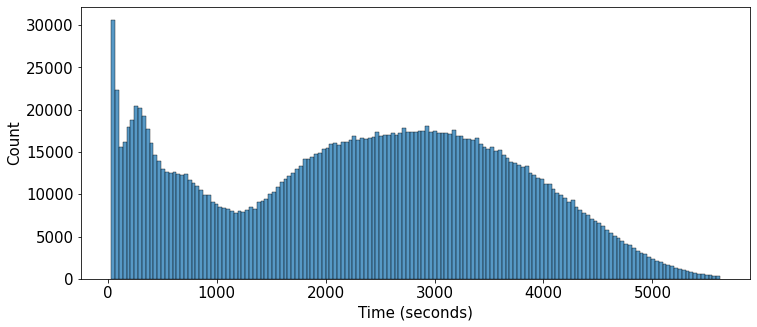

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(df['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (seconds)')

In [35]:
short_trips = df.loc[df['JOURNEY_TIME']<30]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838625 entries, 0 to 1965665
Data columns (total 15 columns):
 #   Column            Dtype   
---  ------            -----   
 0   TRIPID            int32   
 1   PROGRNUMBER       int8    
 2   STOPPOINTID       int16   
 3   PLANNEDTIME_ARR   int32   
 4   ACTUALTIME_ARR    int32   
 5   DOY               int16   
 6   LINEID_DIRECTION  category
 7   JOURNEY_TIME      int32   
 8   HOUR              int8    
 9   temp              int8    
 10  wind_speed        int8    
 11  weather_main      category
 12  DAYOFWEEK         int8    
 13  MONTH             int8    
 14  error             int32   
dtypes: category(2), int16(2), int32(5), int8(6)
memory usage: 70.1 MB


In [37]:
short_trips.nunique()

TRIPID              0
PROGRNUMBER         0
STOPPOINTID         0
PLANNEDTIME_ARR     0
ACTUALTIME_ARR      0
DOY                 0
LINEID_DIRECTION    0
JOURNEY_TIME        0
HOUR                0
temp                0
wind_speed          0
weather_main        0
DAYOFWEEK           0
MONTH               0
error               0
dtype: int64

In [38]:
df["DOY"] = df["DOY"].astype("int16")
df["TRIPID"] = df["TRIPID"].astype("int32")
df["PROGRNUMBER"] = df["PROGRNUMBER"].astype("int8")
df["STOPPOINTID"] = df["STOPPOINTID"].astype("int16")

df["PLANNEDTIME_ARR"] = df["PLANNEDTIME_ARR"].astype("int32")

df["ACTUALTIME_ARR"] = df["ACTUALTIME_ARR"].astype("int32")
df["LINEID_DIRECTION"] = df["LINEID_DIRECTION"].astype("category")

df["JOURNEY_TIME"] = df["JOURNEY_TIME"].astype("int32")
df["HOUR"] = df["HOUR"].astype("int8")
df["MONTH"] = df["MONTH"].astype("int8")
df["error"] = df["error"].astype("int32")

df["DAYOFWEEK"] = df["DAYOFWEEK"].astype("int8")
df["temp"] = df["temp"].astype("int8")
df["wind_speed"] = df["wind_speed"].astype("int8")
df["weather_main"] = df["weather_main"].astype("category")




In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838625 entries, 0 to 1965665
Data columns (total 15 columns):
 #   Column            Dtype   
---  ------            -----   
 0   TRIPID            int32   
 1   PROGRNUMBER       int8    
 2   STOPPOINTID       int16   
 3   PLANNEDTIME_ARR   int32   
 4   ACTUALTIME_ARR    int32   
 5   DOY               int16   
 6   LINEID_DIRECTION  category
 7   JOURNEY_TIME      int32   
 8   HOUR              int8    
 9   temp              int8    
 10  wind_speed        int8    
 11  weather_main      category
 12  DAYOFWEEK         int8    
 13  MONTH             int8    
 14  error             int32   
dtypes: category(2), int16(2), int32(5), int8(6)
memory usage: 70.1 MB


In [40]:
df.JOURNEY_TIME = df.JOURNEY_TIME.astype("float64")

In [41]:
def divide_60(x):
    x = x/60
    return x

In [42]:
df['JOURNEY_TIME']=df['JOURNEY_TIME'].apply(lambda x: divide_60(x))

In [43]:
df.JOURNEY_TIME = df['JOURNEY_TIME'].apply(np.ceil)

In [44]:
df.JOURNEY_TIME = df.JOURNEY_TIME.astype("int16")

In [45]:
df.duplicated().sum()

0

In [46]:
df

,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,DOY,LINEID_DIRECTION,JOURNEY_TIME,HOUR,temp,wind_speed,weather_main,DAYOFWEEK,MONTH,error
0,7021918,56,2034,68504,68890,169,46A_1,81,19,16,6,0,0,6,386
1,7021983,56,2034,67535,67551,169,46A_1,77,19,16,6,0,0,6,16
2,6259158,31,763,83694,84138,41,46A_1,38,23,12,8,0,0,2,444
3,6259158,30,762,83656,84056,41,46A_1,37,23,12,8,0,0,2,400
4,6259158,32,2007,83745,84182,41,46A_1,39,23,12,8,0,0,2,437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965661,7757669,8,814,33612,33644,271,46A_1,8,9,9,4,0,4,9,32
1965662,7165314,4,810,38884,39031,192,46A_1,4,11,9,4,0,2,7,147
1965663,6392125,59,2039,28301,28134,72,46A_1,70,8,3,4,0,1,3,-167
1965664,7647152,14,6059,58214,57955,248,46A_1,15,16,9,8,1,2,9,-259


In [47]:
def draw_correlations(df):
    sns.set(style="white")
    # Calculate correlation of all pairs of continuous features
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(25, 20))

    # Generate a custom colormap - blue and red
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
    square=True, xticklabels=True, yticklabels=True,
    linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 45)

/tmp/ipykernel_24506/2590372882.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


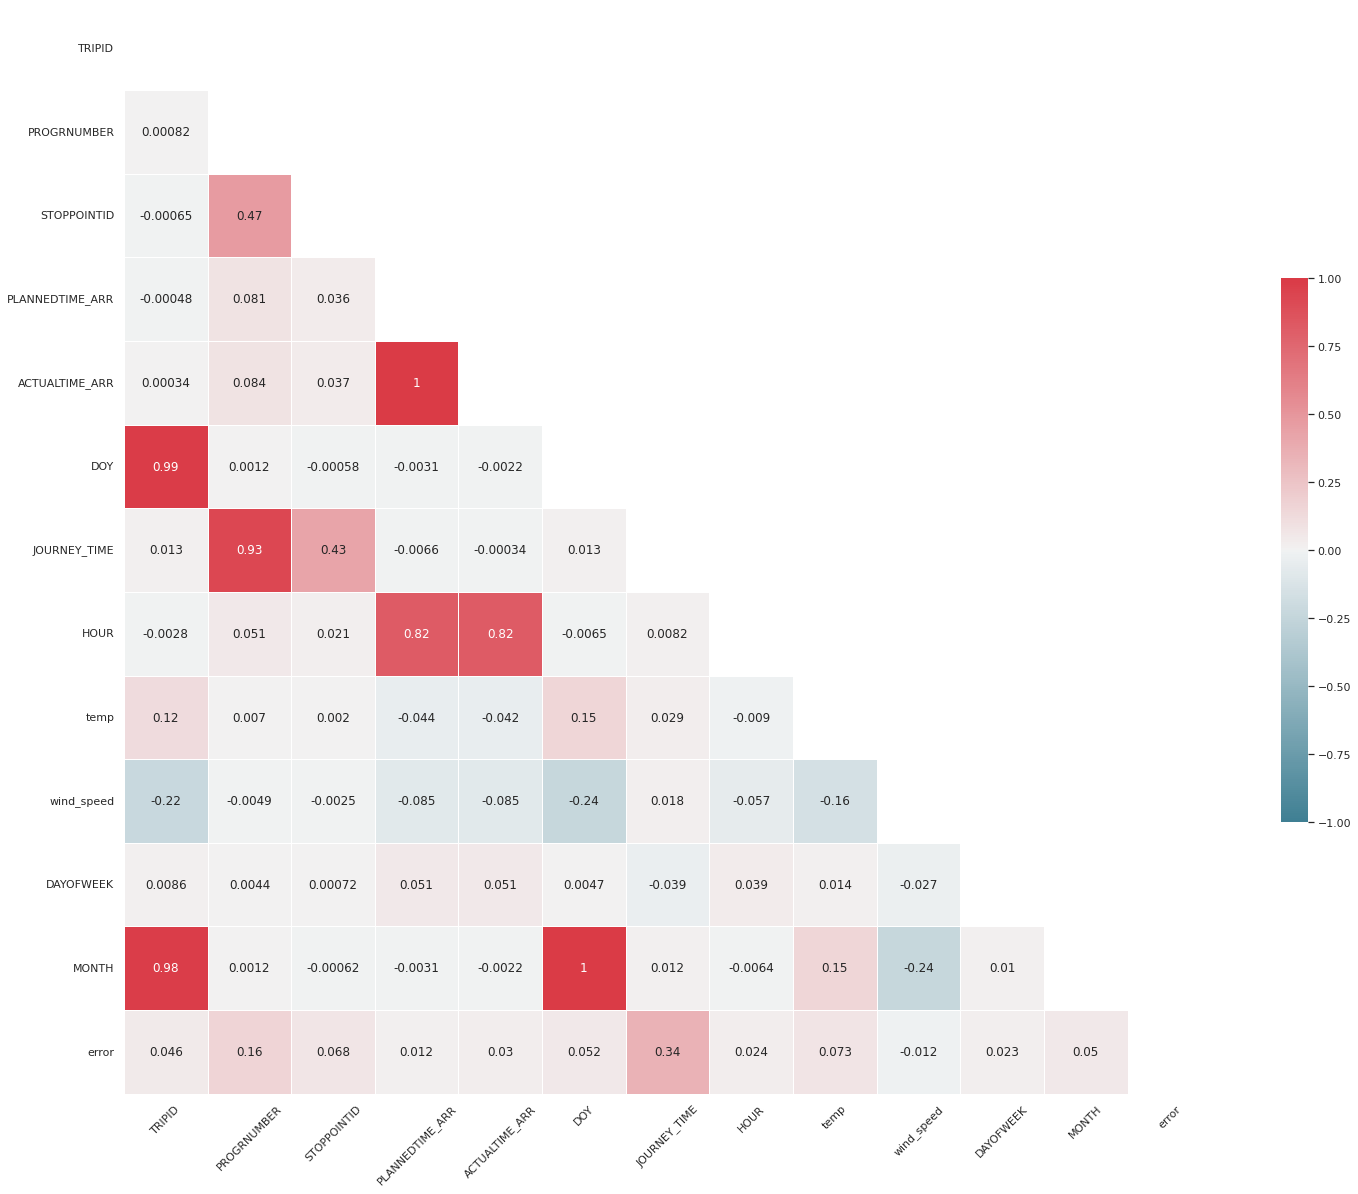

In [48]:
draw_correlations(df)

In [49]:
df

,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,DOY,LINEID_DIRECTION,JOURNEY_TIME,HOUR,temp,wind_speed,weather_main,DAYOFWEEK,MONTH,error
0,7021918,56,2034,68504,68890,169,46A_1,81,19,16,6,0,0,6,386
1,7021983,56,2034,67535,67551,169,46A_1,77,19,16,6,0,0,6,16
2,6259158,31,763,83694,84138,41,46A_1,38,23,12,8,0,0,2,444
3,6259158,30,762,83656,84056,41,46A_1,37,23,12,8,0,0,2,400
4,6259158,32,2007,83745,84182,41,46A_1,39,23,12,8,0,0,2,437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965661,7757669,8,814,33612,33644,271,46A_1,8,9,9,4,0,4,9,32
1965662,7165314,4,810,38884,39031,192,46A_1,4,11,9,4,0,2,7,147
1965663,6392125,59,2039,28301,28134,72,46A_1,70,8,3,4,0,1,3,-167
1965664,7647152,14,6059,58214,57955,248,46A_1,15,16,9,8,1,2,9,-259


In [51]:
df.HOUR.unique()

array([19, 23, 11, 16, 15,  7, 21, 13,  8, 10, 14, 18, 17, 20, 12, 22,  0,
        9,  6,  5], dtype=int8)

In [46]:
def cal_rush(df):
    df['rush_hour'] = 0
    rush_hour = [7,8,9,16,17,18,19]
    weekends = [5,6]
    for i in rush_hour:
        df['rush_hour'].loc[df['HOUR'] == i] = 1
    for j in weekends:
        df['rush_hour'].loc[df['DAYOFWEEK'] == j] = 0
    return df

In [47]:
def cal_frisat(df):
    df['frisat'] =0
    weekends = [4, 5]
    for i in weekends:
        df['frisat'].loc[df['DAYOFWEEK'] == i] = 1
    return df

In [48]:
def cal_LATE_NIGHT(df):
    df['LATE_NIGHT'] = 0
    LATE_NIGHT = [21, 22, 23, 0, 1, 2, 3, 4, 5, 6]
    weekends = [4, 5]
    for i in LATE_NIGHT:
        df['rush_hour'].loc[df['HOUR'] == i] = 1
    for j in weekends:
        df['rush_hour'].loc[df['DAYOFWEEK'] == j] = 0
    return df

In [49]:
def cal_MIDDAY(df):
    df['MIDDAY'] = 0
    MIDDAY = [10, 11, 12, 13, 14, 15]
    weekends = [5, 6]
    for i in MIDDAY:
        df['MIDDAY'].loc[df['HOUR'] == i] = 1
    for j in weekends:
        df['MIDDAY'].loc[df['DAYOFWEEK'] == j] = 0
    return df
df = cal_MIDDAY(df)

/tmp/ipykernel_2461/1860962828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIDDAY'].loc[df['HOUR'] == i] = 1
/tmp/ipykernel_2461/1860962828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIDDAY'].loc[df['DAYOFWEEK'] == j] = 0


In [50]:
def cal_midweek(df):
    df['WEEKDAY'] = 0
    WEEKDAY = [0, 1, 2, 3, 4]
    for i in WEEKDAY:
        df['WEEKDAY'].loc[df['DAYOFWEEK'] == i] = 1
    return df


In [51]:
def cal_summer(df):
    df['SUMMER'] = 0
    summer = [6,7, 8]
    for i in summer:
        df['SUMMER'].loc[df['MONTH'] == i] = 1
    return df

In [52]:
def cal_WINTER(df):
    df['WINTER'] = 0
    WINTER = [11, 12, 1, 2]
    for i in WINTER:
        df['WINTER'].loc[df['MONTH'] == i] = 1
    return df

In [53]:
def cal_MORNING(df):
    df['MORNING'] = 0
    MORNING = [4, 5, 6, 7, 8, 9, 10, 11, 12]
    for i in MORNING:
        df['MORNING'].loc[df['MORNING'] == i] = 1
    return df

In [54]:
%%time
df = cal_rush(df)
df = cal_LATE_NIGHT(df)
df = cal_midweek(df)
df = cal_summer(df)
df = cal_WINTER(df)
df = cal_MIDDAY(df)
df = cal_frisat(df)
df = cal_MORNING(df)
df = cal_MIDDAY(df)



/tmp/ipykernel_2461/3461913905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rush_hour'].loc[df['HOUR'] == i] = 1
/tmp/ipykernel_2461/3461913905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rush_hour'].loc[df['DAYOFWEEK'] == j] = 0
/tmp/ipykernel_2461/3222303529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rush_hour'].loc[df['HOUR'] == i] = 1
/tmp/ipykernel_2461/3222303529.py:8: SettingWithCopyWarning: 


CPU times: user 1.58 s, sys: 51.6 ms, total: 1.64 s
Wall time: 1.63 s


/tmp/ipykernel_2461/1860962828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIDDAY'].loc[df['HOUR'] == i] = 1
/tmp/ipykernel_2461/1860962828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIDDAY'].loc[df['DAYOFWEEK'] == j] = 0


In [55]:
type(df)

pandas.core.frame.DataFrame

In [56]:
df

,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,DOY,LINEID_DIRECTION,JOURNEY_TIME,HOUR,temp,...,MONTH,error,MIDDAY,rush_hour,LATE_NIGHT,WEEKDAY,SUMMER,WINTER,frisat,MORNING
0,7021918,56,2034,68504,68890,169,46A_1,81,19,16,...,6,386,0,1,0,1,1,0,0,0
1,7021983,56,2034,67535,67551,169,46A_1,77,19,16,...,6,16,0,1,0,1,1,0,0,0
2,6259158,31,763,83694,84138,41,46A_1,38,23,12,...,2,444,0,1,0,1,0,1,0,0
3,6259158,30,762,83656,84056,41,46A_1,37,23,12,...,2,400,0,1,0,1,0,1,0,0
4,6259158,32,2007,83745,84182,41,46A_1,39,23,12,...,2,437,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965661,7757669,8,814,33612,33644,271,46A_1,8,9,9,...,9,32,0,0,0,1,0,0,1,0
1965662,7165314,4,810,38884,39031,192,46A_1,4,11,9,...,7,147,1,0,0,1,1,0,0,0
1965663,6392125,59,2039,28301,28134,72,46A_1,70,8,3,...,3,-167,0,1,0,1,0,0,0,0
1965664,7647152,14,6059,58214,57955,248,46A_1,15,16,9,...,9,-259,0,1,0,1,0,0,0,0


In [57]:
# NOT NECESSARY ANYMORE
def dummy_feature(x):
    # add rush hour
    #x = cal_rush(x)
    # convert weather type
    #x['weather_main'] = x['weather_main'].apply(lambda x: 1 if (x == "Rain" or x == "Mist" or x == "Thunderstorm") else 0)
    # add month dummies
    #monthDummies = pd.get_dummies(x['MONTH'], prefix='MONTH', drop_first=False)
    #x = pd.concat([x, monthDummies], axis=1)
    # add weekday dummies
    #dayDummies = pd.get_dummies(x['DAYOFWEEK'], prefix='DAYOFWEEK', drop_first=False)
    #x = pd.concat([x, dayDummies], axis=1)
    # add hour dummies
    #hourDummies = pd.get_dummies(x['HOUR'], prefix='HOUR', drop_first=False)
    #x = pd.concat([x, hourDummies], axis=1)
    return x

In [58]:
#df = dummy_feature(df)

In [59]:
df

,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,DOY,LINEID_DIRECTION,JOURNEY_TIME,HOUR,temp,...,MONTH,error,MIDDAY,rush_hour,LATE_NIGHT,WEEKDAY,SUMMER,WINTER,frisat,MORNING
0,7021918,56,2034,68504,68890,169,46A_1,81,19,16,...,6,386,0,1,0,1,1,0,0,0
1,7021983,56,2034,67535,67551,169,46A_1,77,19,16,...,6,16,0,1,0,1,1,0,0,0
2,6259158,31,763,83694,84138,41,46A_1,38,23,12,...,2,444,0,1,0,1,0,1,0,0
3,6259158,30,762,83656,84056,41,46A_1,37,23,12,...,2,400,0,1,0,1,0,1,0,0
4,6259158,32,2007,83745,84182,41,46A_1,39,23,12,...,2,437,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965661,7757669,8,814,33612,33644,271,46A_1,8,9,9,...,9,32,0,0,0,1,0,0,1,0
1965662,7165314,4,810,38884,39031,192,46A_1,4,11,9,...,7,147,1,0,0,1,1,0,0,0
1965663,6392125,59,2039,28301,28134,72,46A_1,70,8,3,...,3,-167,0,1,0,1,0,0,0,0
1965664,7647152,14,6059,58214,57955,248,46A_1,15,16,9,...,9,-259,0,1,0,1,0,0,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838625 entries, 0 to 1965665
Data columns (total 23 columns):
 #   Column            Dtype   
---  ------            -----   
 0   TRIPID            int32   
 1   PROGRNUMBER       int8    
 2   STOPPOINTID       int16   
 3   PLANNEDTIME_ARR   int32   
 4   ACTUALTIME_ARR    int32   
 5   DOY               int16   
 6   LINEID_DIRECTION  category
 7   JOURNEY_TIME      int16   
 8   HOUR              int8    
 9   temp              int8    
 10  wind_speed        int8    
 11  weather_main      category
 12  DAYOFWEEK         int8    
 13  MONTH             int8    
 14  error             int32   
 15  MIDDAY            int64   
 16  rush_hour         int64   
 17  LATE_NIGHT        int64   
 18  WEEKDAY           int64   
 19  SUMMER            int64   
 20  WINTER            int64   
 21  frisat            int64   
 22  MORNING           int64   
dtypes: category(2), int16(3), int32(4), int64(8), int8(6)
memory usage: 178.9 MB


In [61]:

df["rush_hour"] = df["rush_hour"].astype("category")
df["LATE_NIGHT"] = df["LATE_NIGHT"].astype("category")
df["WEEKDAY"] = df["WEEKDAY"].astype("category")
df["SUMMER"] = df["SUMMER"].astype("category")
df["WINTER"] = df["WINTER"].astype("category")
df["MIDDAY"] = df["MIDDAY"].astype("category")
df["frisat"] = df["frisat"].astype("category")
df["MORNING"] = df["MORNING"].astype("category")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838625 entries, 0 to 1965665
Data columns (total 23 columns):
 #   Column            Dtype   
---  ------            -----   
 0   TRIPID            int32   
 1   PROGRNUMBER       int8    
 2   STOPPOINTID       int16   
 3   PLANNEDTIME_ARR   int32   
 4   ACTUALTIME_ARR    int32   
 5   DOY               int16   
 6   LINEID_DIRECTION  category
 7   JOURNEY_TIME      int16   
 8   HOUR              int8    
 9   temp              int8    
 10  wind_speed        int8    
 11  weather_main      category
 12  DAYOFWEEK         int8    
 13  MONTH             int8    
 14  error             int32   
 15  MIDDAY            category
 16  rush_hour         category
 17  LATE_NIGHT        category
 18  WEEKDAY           category
 19  SUMMER            category
 20  WINTER            category
 21  frisat            category
 22  MORNING           category
dtypes: category(10), int16(3), int32(4), int8(6)
memory usage: 80.7 MB


In [63]:
# NOT NECESSARY ANYMORE
# breakingcode
# df["rush_hour"] = df["rush_hour"].astype("category")
# df["HOUR_0"] = df["HOUR_0"].astype("category")
# #df["HOUR_1"] = df["HOUR_1"].astype("category")
# #df["HOUR_2"] = df["HOUR_2"].astype("category")
# #df["HOUR_3"] = df["HOUR_3"].astype("category")
# #df["HOUR_4"] = df["HOUR_4"].astype("category")
# df["HOUR_5"] = df["HOUR_5"].astype("category")
# df["HOUR_6"] = df["HOUR_6"].astype("category")
# df["HOUR_7"] = df["HOUR_7"].astype("category")
# df["HOUR_8"] = df["HOUR_8"].astype("category")
# df["HOUR_9"] = df["HOUR_9"].astype("category")
# df["HOUR_10"] = df["HOUR_10"].astype("category")
# df["HOUR_11"] = df["HOUR_11"].astype("category")
# df["HOUR_12"] = df["HOUR_12"].astype("category")
# df["HOUR_13"] = df["HOUR_13"].astype("category")
# df["HOUR_14"] = df["HOUR_14"].astype("category")
# df["HOUR_15"] = df["HOUR_15"].astype("category")
# df["HOUR_16"] = df["HOUR_16"].astype("category")
# df["HOUR_17"] = df["HOUR_17"].astype("category")
# df["HOUR_18"] = df["HOUR_18"].astype("category")
# df["HOUR_19"] = df["HOUR_19"].astype("category")
# df["HOUR_20"] = df["HOUR_20"].astype("category")
# df["HOUR_21"] = df["HOUR_21"].astype("category")
# df["HOUR_22"] = df["HOUR_22"].astype("category")
# df["HOUR_23"] = df["HOUR_23"].astype("category")

# df["MONTH_1"] = df["MONTH_1"].astype("category")
# df["MONTH_2"] = df["MONTH_2"].astype("category")
# df["MONTH_3"] = df["MONTH_3"].astype("category")
# df["MONTH_4"] = df["MONTH_4"].astype("category")
# df["MONTH_5"] = df["MONTH_5"].astype("category")
# df["MONTH_6"] = df["MONTH_6"].astype("category")
# df["MONTH_7"] = df["MONTH_7"].astype("category")
# df["MONTH_8"] = df["MONTH_8"].astype("category")
# df["MONTH_9"] = df["MONTH_9"].astype("category")
# df["MONTH_10"] = df["MONTH_10"].astype("category")
# df["MONTH_11"] = df["MONTH_11"].astype("category")
# df["MONTH_12"] = df["MONTH_12"].astype("category")

# df["DAYOFWEEK_0"] = df["DAYOFWEEK_0"].astype("category")
# df["DAYOFWEEK_1"] = df["DAYOFWEEK_1"].astype("category")
# df["DAYOFWEEK_2"] = df["DAYOFWEEK_2"].astype("category")
# df["DAYOFWEEK_3"] = df["DAYOFWEEK_3"].astype("category")
# df["DAYOFWEEK_4"] = df["DAYOFWEEK_4"].astype("category")
# df["DAYOFWEEK_5"] = df["DAYOFWEEK_5"].astype("category")
# df["DAYOFWEEK_6"] = df["DAYOFWEEK_6"].astype("category")






In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838625 entries, 0 to 1965665
Data columns (total 23 columns):
 #   Column            Dtype   
---  ------            -----   
 0   TRIPID            int32   
 1   PROGRNUMBER       int8    
 2   STOPPOINTID       int16   
 3   PLANNEDTIME_ARR   int32   
 4   ACTUALTIME_ARR    int32   
 5   DOY               int16   
 6   LINEID_DIRECTION  category
 7   JOURNEY_TIME      int16   
 8   HOUR              int8    
 9   temp              int8    
 10  wind_speed        int8    
 11  weather_main      category
 12  DAYOFWEEK         int8    
 13  MONTH             int8    
 14  error             int32   
 15  MIDDAY            category
 16  rush_hour         category
 17  LATE_NIGHT        category
 18  WEEKDAY           category
 19  SUMMER            category
 20  WINTER            category
 21  frisat            category
 22  MORNING           category
dtypes: category(10), int16(3), int32(4), int8(6)
memory usage: 80.7 MB


In [65]:
tester = df.drop(["ACTUALTIME_ARR", "STOPPOINTID", "LINEID_DIRECTION", "error", "DAYOFWEEK", "MONTH","HOUR", "TRIPID", "temp", "wind_speed", "HOUR", "DOY", "DAYOFWEEK", "PLANNEDTIME_ARR"], axis=1)

In [66]:
tester.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838625 entries, 0 to 1965665
Data columns (total 11 columns):
 #   Column        Dtype   
---  ------        -----   
 0   PROGRNUMBER   int8    
 1   JOURNEY_TIME  int16   
 2   weather_main  category
 3   MIDDAY        category
 4   rush_hour     category
 5   LATE_NIGHT    category
 6   WEEKDAY       category
 7   SUMMER        category
 8   WINTER        category
 9   frisat        category
 10  MORNING       category
dtypes: category(9), int16(1), int8(1)
memory usage: 35.1 MB


In [67]:
tester

,PROGRNUMBER,JOURNEY_TIME,weather_main,MIDDAY,rush_hour,LATE_NIGHT,WEEKDAY,SUMMER,WINTER,frisat,MORNING
0,56,81,0,0,1,0,1,1,0,0,0
1,56,77,0,0,1,0,1,1,0,0,0
2,31,38,0,0,1,0,1,0,1,0,0
3,30,37,0,0,1,0,1,0,1,0,0
4,32,39,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1965661,8,8,0,0,0,0,1,0,0,1,0
1965662,4,4,0,1,0,0,1,1,0,0,0
1965663,59,70,0,0,1,0,1,0,0,0,0
1965664,14,15,1,0,1,0,1,0,0,0,0


In [73]:
tester.MIDDAY.value_counts()

0    1297620
1     541005
Name: MIDDAY, dtype: int64

In [74]:
tester.rush_hour.value_counts()

0    1163302
1     675323
Name: rush_hour, dtype: int64

In [76]:
tester.LATE_NIGHT.value_counts()

0    1838625
Name: LATE_NIGHT, dtype: int64

In [77]:
tester.WEEKDAY.value_counts()

1    1404594
0     434031
Name: WEEKDAY, dtype: int64

In [78]:
tester.SUMMER.value_counts()

0    1388899
1     449726
Name: SUMMER, dtype: int64

In [79]:
tester.WINTER.value_counts()

0    1213106
1     625519
Name: WINTER, dtype: int64

In [81]:
tester.frisat.value_counts()

0    1365126
1     473499
Name: frisat, dtype: int64

In [82]:
tester.MORNING.value_counts()

0    1838625
Name: MORNING, dtype: int64

In [ ]:
def modelEvalucation(actualVal, predictions):
    #classification evaluation measures
    print("MAE: ", metrics.mean_absolute_error(actualVal, predictions))
    print("MSE: ", metrics.mean_squared_error(actualVal, predictions))
    print("MAPE:", metrics.mean_absolute_percentage_error(actualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(actualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(actualVal, predictions))
    print("\n")

# Maximising Results for Smaller Model 

As the model sizes before hyperparameter adjustments have been found to be too large, it is important to find the best way to reduce the file size without compromising the most on accuracy and errors. Below I am checking for the best parameters for just the 46A. Unlike the previous attempt to get the best results for all routes in the trips modelling file, the problem now is to condense the pickle file sizes enough to be competently hosted on the UCD server without creating runtime issues for other components. 

As previously established, the 46A produces the largest file size of 781MB in 3.2 test_46A. The aim below is to adjust parameters so as to ensure the routes with the largest amount of data have just enough breadth and depth of search to maintain a good level of accuracy. Doing this should also work for mid-frequency routes however setting a minimum number of samples for splits to take place will negatively effect low-frequency routes somewhat. Having an already high level of accuracy however should justify the hit, and it is expected that at risk models will not dip below an R2 of .6

In [ ]:
#getting the best pool of hyperparameters from the parameters here, results are also cross validated to ensure stability 

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [15, 20, 25, 30],
       'min_samples_leaf': [1, 2, 4, 8, 10],
       'min_samples_split': [2, 5, 10],
       'max_features': [1.0, 10, 20, 30, 40, 50,'sqrt'],
       'max_depth': [int(i) for i in np.linspace(10, 70, num = 6)],
       'max_leaf_nodes': [25, 50, 75, 100, 125]}

params_array = []

print(f"best outcomes with tuned parameters")
MAPEs = []
R2 = []
dt = tester
y=dt["JOURNEY_TIME"] 
x=dt.drop('JOURNEY_TIME', axis=1)
features=x.columns.values.tolist()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
#modelEvalucation(y_test, prediction)
#random search CV uses cross validation to aid in optimising results
randomise = RandomizedSearchCV(estimator = rfc, n_iter = 120, cv = 5, verbose=2, param_distributions = params, random_state=1, n_jobs = -1)
randomise.fit(X_train, y_train)
print(randomise.cv_results_)
params_array.append(randomise.best_params_)
print(f"best params {randomise.best_params_}")
MAPEs += [metrics.mean_absolute_percentage_error(y_test, prediction)]
R2 += [metrics.r2_score(y_test, prediction)]
print('MAPE: ',MAPEs)
print('R2: ', R2)

best params {'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_leaf_nodes': 125, 'max_features': 10, 'max_depth': 34}
MAPE:  [0.1833935396496498]
R2:  [0.884959127130282]

In [ ]:
#using best paramaters from cross validated model above
MAPEs = []
R2 = []
dt = tester
y=dt["JOURNEY_TIME"] 
x=dt.drop('JOURNEY_TIME', axis=1)
features=x.columns.values.tolist()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
rfc = RandomForestRegressor(n_estimators=30, n_jobs=-1, max_features=10, max_depth=34, min_samples_leaf=10, min_samples_split=15)
rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
#modelEvalucation(y_test, prediction)
MAPEs += [metrics.mean_absolute_percentage_error(y_test, prediction)]
R2 += [metrics.r2_score(y_test, prediction)]
print('MAPE: ',MAPEs)
print('R2: ', R2)

In [3]:
filename= "./test_46a_min_estimators.pkl"
pickle.dump(rfc,open(filename, 'wb', pickle.HIGHEST_PROTOCOL))

NameError: name 'rfc' is not defined

In [4]:
test_46a = pickle.load(open("./test_46a_min_estimators.pkl",'rb'))

FileNotFoundError: [Errno 2] No such file or directory: './test_46a_min_estimators.pkl'

In [ ]:
test_46a.predict(X_test)

In [ ]:
type(rfc)

In [ ]:
prediction.min()

In [ ]:
prediction.max()

In [ ]:
y_test.max()

In [ ]:
y_test.min()

In [ ]:
y_train.min()
# must remove negative values

In [ ]:
y_train.max()

In [ ]:
filename= "./test_pickle_ben.pkl"
#filename = f"space_predict_station_{i}.pkl"
pickle.dump(rfc,open(filename, 'wb'))


In [ ]:
ls

In [ ]:
pickeltest = pickle.load(open("./test_pickle_ben.pkl",'rb'))

In [ ]:
type(pickeltest)

In [ ]:
pickelpredictions = pickeltest.predict(X_test)

In [ ]:
psutil.virtual_memory()

In [ ]:
singletest = X_test.head(5)

In [ ]:
singletest

In [ ]:
singleans = y_test.head(5)

In [ ]:
prediction = rfc.predict(singletest)

In [ ]:
prediction

In [ ]:
singleans